In [1]:
# Core libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as pdr
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.stattools as sts
# Jupyter display settings
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
tickers = ['AAPL', 'KO', 'TSLA', 'JPM', 'XOM', 'AMD', 'NVDA']

start_date = '2013-01-01'
end_date = '2025-03-31'

price_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

price_data.reset_index('Date')

price_data.head()



[*********************100%***********************]  7 of 7 completed


Ticker,AAPL,AMD,JPM,KO,NVDA,TSLA,XOM
Date,,,,,,,
2013-01-02,16.647181,2.53,31.950426,25.450554,0.293467,2.357333,53.340282
2013-01-03,16.437057,2.49,31.886030,25.450554,0.293698,2.318000,53.244061
2013-01-04,15.979214,2.59,32.451202,25.491169,0.303388,2.293333,53.490593
2013-01-07,15.885217,2.67,32.486984,25.247488,0.294621,2.289333,52.871269
2013-01-08,15.927963,2.67,32.551357,25.071508,0.288161,2.245333,53.201981


In [3]:
log_returns = np.log(price_data/price_data.shift(1))
log_returns = log_returns.dropna()
log_returns.head()

Ticker,AAPL,AMD,JPM,KO,NVDA,TSLA,XOM
Date,,,,,,,
2013-01-03,-0.012702,-0.015937,-0.002018,0.000000,0.000787,-0.016826,-0.001806
2013-01-04,-0.028250,0.039375,0.017570,0.001595,0.032460,-0.010699,0.004620
2013-01-07,-0.005900,0.030421,0.001102,-0.009605,-0.029323,-0.001746,-0.011646
2013-01-08,0.002687,0.000000,0.001980,-0.006995,-0.022170,-0.019407,0.006236
2013-01-09,-0.015752,-0.015095,-0.000659,-0.000270,-0.022673,-0.001188,-0.003850


### Building Equal Weighted Portfolio

In [4]:
portfolio_log_return = log_returns.mean(axis=1)
portfolio_log_return = portfolio_log_return.to_frame(name='portfolio')
portfolio_log_return['volatility'] = portfolio_log_return['portfolio'].rolling(30).std()
portfolio_log_return.head()

,portfolio,volatility
Date,,
2013-01-03,-0.006929,NaN
2013-01-04,0.008096,NaN
2013-01-07,-0.003814,NaN
2013-01-08,-0.005381,NaN
2013-01-09,-0.008498,NaN


### Portfolio Visualization

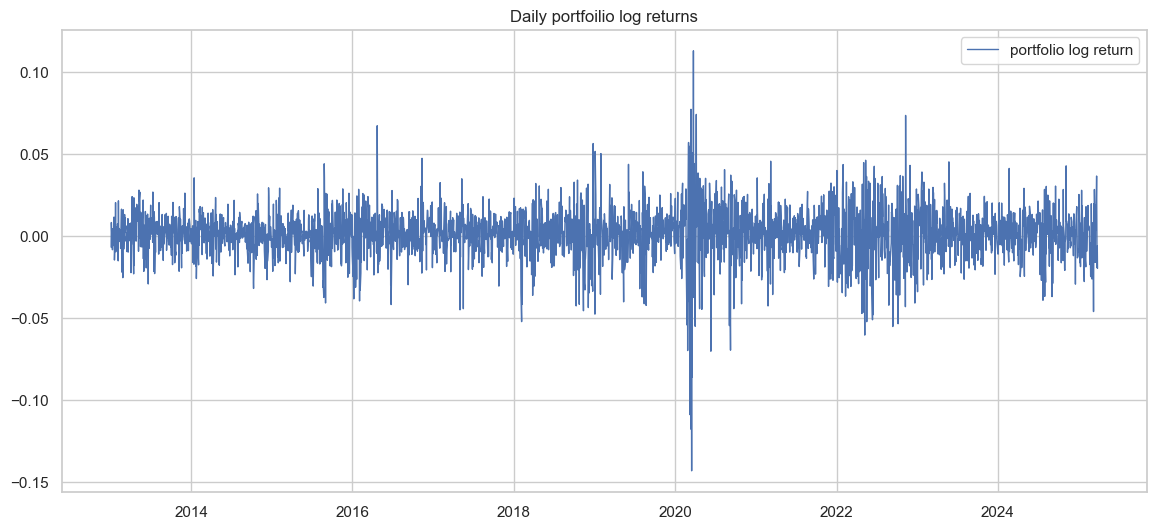

In [5]:
fig, ax = plt.subplots(figsize=(14, 6))

x = portfolio_log_return.index
y= portfolio_log_return['portfolio']

ax.plot(x,y, label = 'portfolio log return', linewidth =1)
ax.set_title('Daily portfoilio log returns')
ax.legend()
plt.show()

##### To see how volatility changes over time

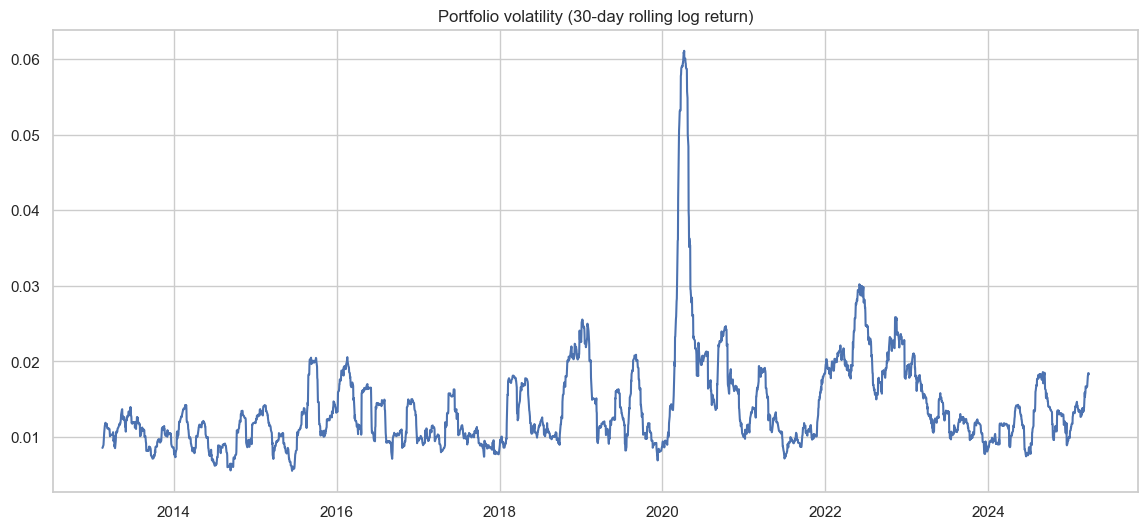

In [6]:
fig, ax = plt.subplots(figsize=(14,6))

x = portfolio_log_return.index
y= portfolio_log_return['volatility']

ax.plot(x,y)
ax.set_title("Portfolio volatility (30-day rolling log return)")

plt.show()


#### How volatility changes with Returns

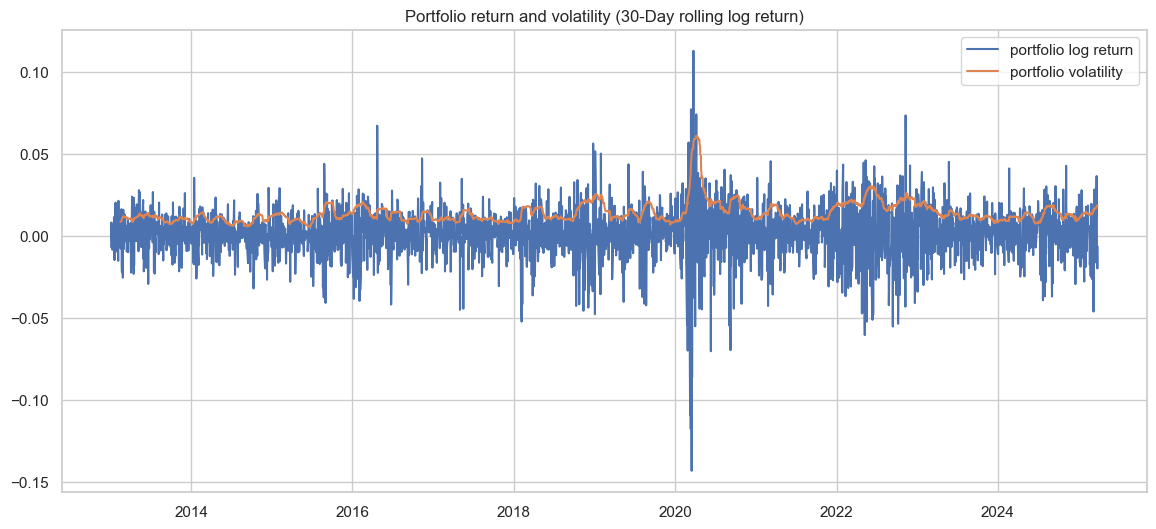

In [7]:
fig, ax = plt.subplots(figsize=(14,6))

x = portfolio_log_return.index
y = portfolio_log_return[['portfolio', 'volatility']]

ax.plot(x,y,label = ['portfolio log return', 'portfolio volatility'])
ax.set_title ('Portfolio return and volatility (30-Day rolling log return)')
ax.legend()
plt.show()

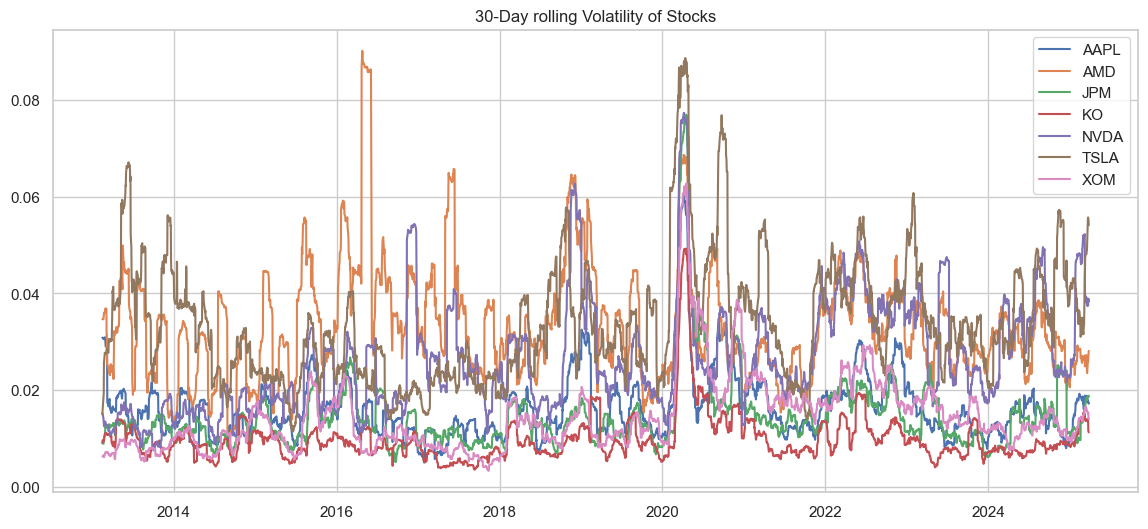

In [8]:
rolling_vol = log_returns.rolling(window=30).std()

fig, ax = plt.subplots(figsize=(14,6))

for ticker in rolling_vol.columns:
    x = rolling_vol.index
    y = rolling_vol[ticker]
    ax.plot(x,y, label = ticker)


ax.set_title('30-Day rolling Volatility of Stocks')
ax.legend()
plt.show()

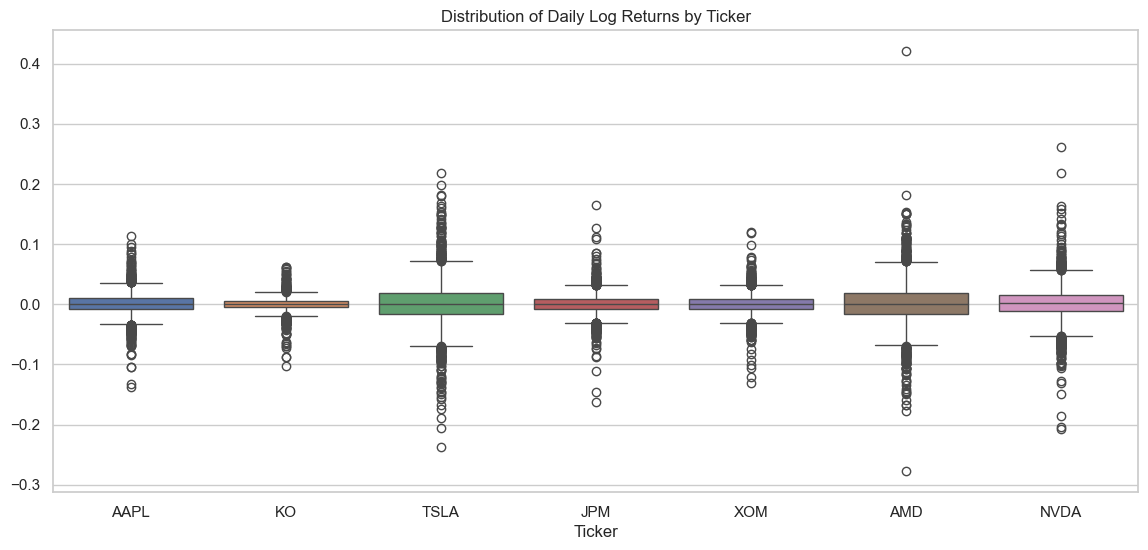

In [9]:
fig, ax = plt.subplots(figsize=(14,6))

x = log_returns.columns
y = log_returns[['AAPL', 'KO', 'TSLA', 'JPM', 'XOM', 'AMD', 'NVDA']]

sns.boxplot(y)

ax.set_title('Distribution of Daily Log Returns by Ticker')


plt.show()

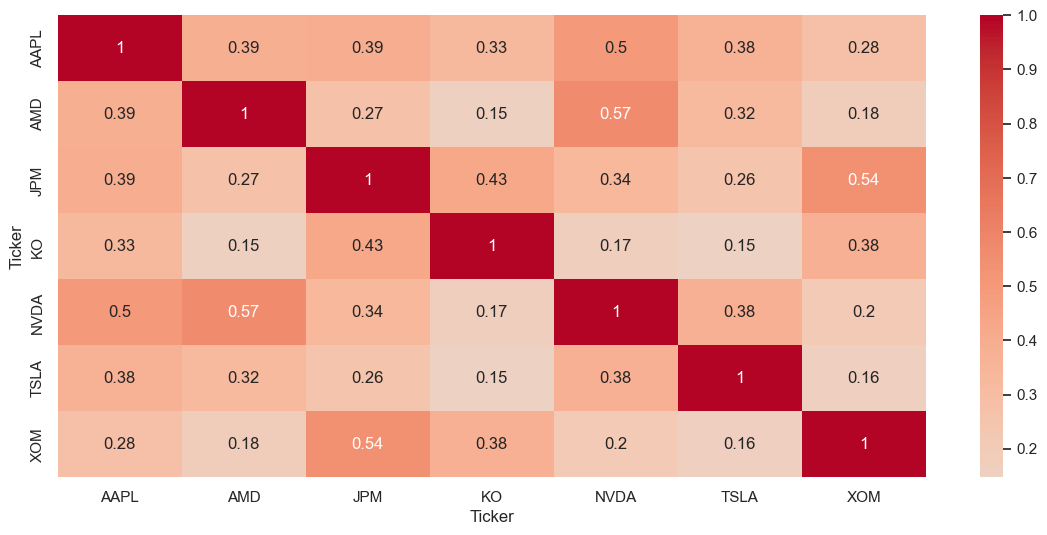

In [10]:
fig, ax = plt.subplots(figsize=(14,6))

corr_matrix = log_returns.corr()

sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', center=0 )

plt.show()

#### Pull Fama-French daily factor and momentum

In [11]:
ff_data = pdr.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', start = '2013-01-01')[0]
ff_data = ff_data/100
ff_data.index = pd.to_datetime(ff_data.index)
ff_data

/var/folders/40/s4f2hrxs7sd19qb8q2_3j3fm0000gn/T/ipykernel_81631/1121730025.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_data = pdr.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', start = '2013-01-01')[0]


,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2013-01-02,0.0262,0.0010,0.0041,-0.0067,-0.0001,0.00000
2013-01-03,-0.0013,0.0014,0.0005,0.0022,0.0024,0.00000
2013-01-04,0.0055,0.0019,0.0037,-0.0036,0.0024,0.00000
2013-01-07,-0.0031,-0.0012,-0.0036,-0.0015,-0.0017,0.00000
2013-01-08,-0.0026,0.0004,-0.0001,-0.0014,0.0007,0.00000
...,...,...,...,...,...,...
2025-04-24,0.0214,-0.0003,-0.0095,-0.0119,0.0003,0.00017
2025-04-25,0.0064,-0.0047,-0.0115,0.0001,-0.0016,0.00017
2025-04-28,0.0008,0.0032,0.0014,-0.0003,-0.0017,0.00017


In [12]:
momentum_data = pdr.DataReader('F-F_Momentum_Factor_daily', 'famafrench', start='2013-01-01')[0]
momentum_data.index = pd.to_datetime(momentum_data.index)
momentum_data

/var/folders/40/s4f2hrxs7sd19qb8q2_3j3fm0000gn/T/ipykernel_81631/3853074358.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  momentum_data = pdr.DataReader('F-F_Momentum_Factor_daily', 'famafrench', start='2013-01-01')[0]


,Mom
Date,
2013-01-02,0.20
2013-01-03,-0.44
2013-01-04,-0.38
2013-01-07,0.20
2013-01-08,0.83
...,...
2025-04-24,-0.32
2025-04-25,0.47
2025-04-28,0.11


### Merge Fama French factors with Portfolio

In [13]:
merged_df = portfolio_log_return.merge(ff_data, on='Date', how='left')

merged_df.head()

,portfolio,volatility,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,,
2013-01-03,-0.006929,NaN,-0.0013,0.0014,0.0005,0.0022,0.0024,0.0
2013-01-04,0.008096,NaN,0.0055,0.0019,0.0037,-0.0036,0.0024,0.0
2013-01-07,-0.003814,NaN,-0.0031,-0.0012,-0.0036,-0.0015,-0.0017,0.0
2013-01-08,-0.005381,NaN,-0.0026,0.0004,-0.0001,-0.0014,0.0007,0.0
2013-01-09,-0.008498,NaN,0.0035,0.0024,-0.0040,-0.0005,-0.0018,0.0


In [14]:
merged_df['Excess_portfolio'] = merged_df['portfolio'] - merged_df['RF']
merged_df.head()

,portfolio,volatility,Mkt-RF,SMB,HML,RMW,CMA,RF,Excess_portfolio
Date,,,,,,,,,
2013-01-03,-0.006929,NaN,-0.0013,0.0014,0.0005,0.0022,0.0024,0.0,-0.006929
2013-01-04,0.008096,NaN,0.0055,0.0019,0.0037,-0.0036,0.0024,0.0,0.008096
2013-01-07,-0.003814,NaN,-0.0031,-0.0012,-0.0036,-0.0015,-0.0017,0.0,-0.003814
2013-01-08,-0.005381,NaN,-0.0026,0.0004,-0.0001,-0.0014,0.0007,0.0,-0.005381
2013-01-09,-0.008498,NaN,0.0035,0.0024,-0.0040,-0.0005,-0.0018,0.0,-0.008498


#### Estimate Regression Coefficients using OLS

In [15]:
#Response variables
Y = merged_df['Excess_portfolio']

#Explanatory variables
X = merged_df[['Mkt-RF', 'SMB', 'HML','RMW', 'CMA']]

#Intercept terms for Alpha
X = sm.add_constant(X)
print(X)

            const  Mkt-RF     SMB     HML     RMW     CMA
Date                                                     
2013-01-03    1.0 -0.0013  0.0014  0.0005  0.0022  0.0024
2013-01-04    1.0  0.0055  0.0019  0.0037 -0.0036  0.0024
2013-01-07    1.0 -0.0031 -0.0012 -0.0036 -0.0015 -0.0017
2013-01-08    1.0 -0.0026  0.0004 -0.0001 -0.0014  0.0007
2013-01-09    1.0  0.0035  0.0024 -0.0040 -0.0005 -0.0018
...           ...     ...     ...     ...     ...     ...
2025-03-24    1.0  0.0193  0.0056 -0.0043 -0.0055 -0.0042
2025-03-25    1.0  0.0012 -0.0089  0.0005  0.0016 -0.0068
2025-03-26    1.0 -0.0122  0.0009  0.0153  0.0111 -0.0014
2025-03-27    1.0 -0.0042  0.0023  0.0030  0.0029 -0.0014
2025-03-28    1.0 -0.0207 -0.0032  0.0041  0.0037  0.0075

[3078 rows x 6 columns]


#### Fit OLS Model

In [16]:
model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Excess_portfolio   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1798.
Date:                Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                        05:17:51   Log-Likelihood:                 10596.
No. Observations:                3078   AIC:                        -2.118e+04
Df Residuals:                    3072   BIC:                        -2.114e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.213      0.0

In [17]:
merged_df['Predicted Returns'] = model.fittedvalues
merged_df['Residual'] = model.resid

#### Plotting factors

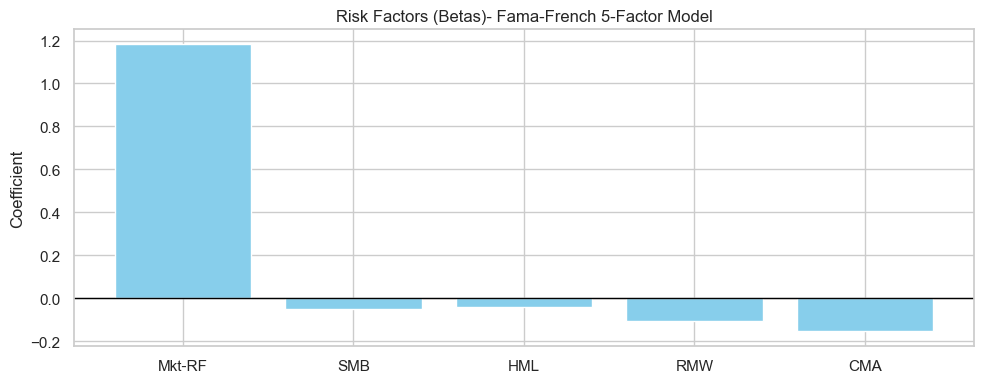

In [18]:
# Extract betas (excluding intercept)
betas = model.params.drop('const')

fig, ax  = plt.subplots(figsize=(10,4))

x = betas.index
y = betas.values
ax.bar(x, y ,color='skyblue')

ax.set_title('Risk Factors (Betas)- Fama-French 5-Factor Model')
ax.set_ylabel('Coefficient')
ax.axhline(0, color='black', linewidth=1)
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

#### Plotting actual vs predicted log returns

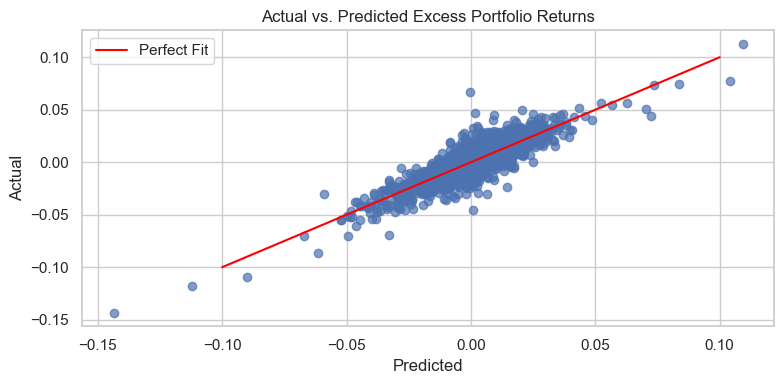

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))

x = merged_df['Predicted Returns']
y = merged_df['Excess_portfolio']

ax.scatter(x,y, alpha=0.7)
ax.plot([-0.10, 0.10], [-0.10, 0.10], color='red', label='Perfect Fit')

ax.set_title('Actual vs. Predicted Excess Portfolio Returns')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.legend()

plt.tight_layout()
plt.show()


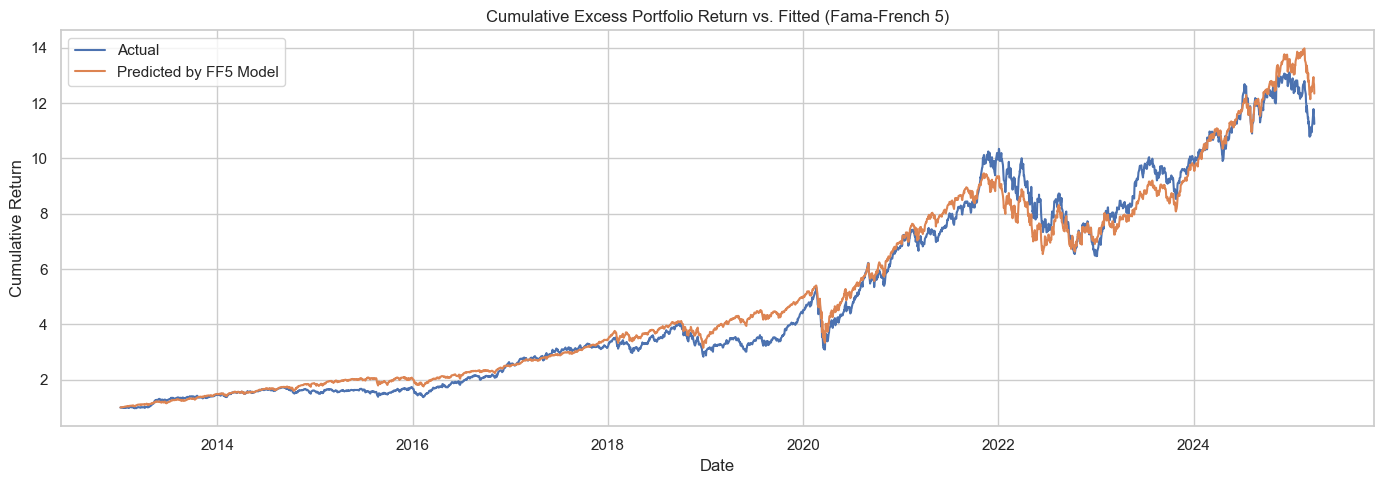

In [20]:
cumulative_actual = (1 + merged_df['Excess_portfolio']).cumprod()
cumulative_predicted = (1 + merged_df['Predicted Returns']).cumprod()

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(cumulative_actual, label='Actual')
ax.plot(cumulative_predicted, label='Predicted by FF5 Model')

ax.set_title('Cumulative Excess Portfolio Return vs. Fitted (Fama-French 5)')
ax.set_ylabel('Cumulative Return')
ax.set_xlabel('Date')
ax.legend()

plt.tight_layout()
plt.show()

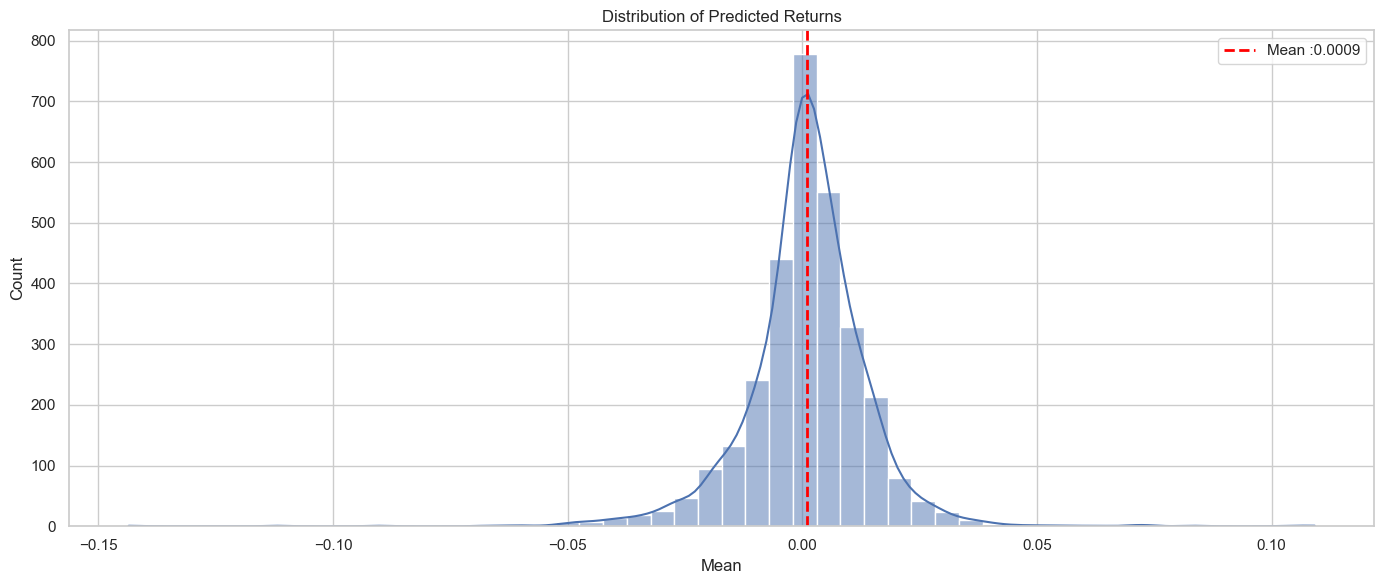

In [21]:
fig, ax = plt.subplots(figsize=(14,6))

data = merged_df['Predicted Returns']

mean_return = merged_df['Predicted Returns'].mean()

sns.histplot(data, bins=50, kde=True, ax=ax)
ax.axvline(mean_return, color = 'red', linestyle ='--', linewidth=2, label= f'Mean :{mean_return:.4f}')
ax.set_title('Distribution of Predicted Returns')
ax.set_xlabel('Mean')

plt.legend()
plt.tight_layout()
plt.show()

#### Plotting model residuals for OLS Assumptions

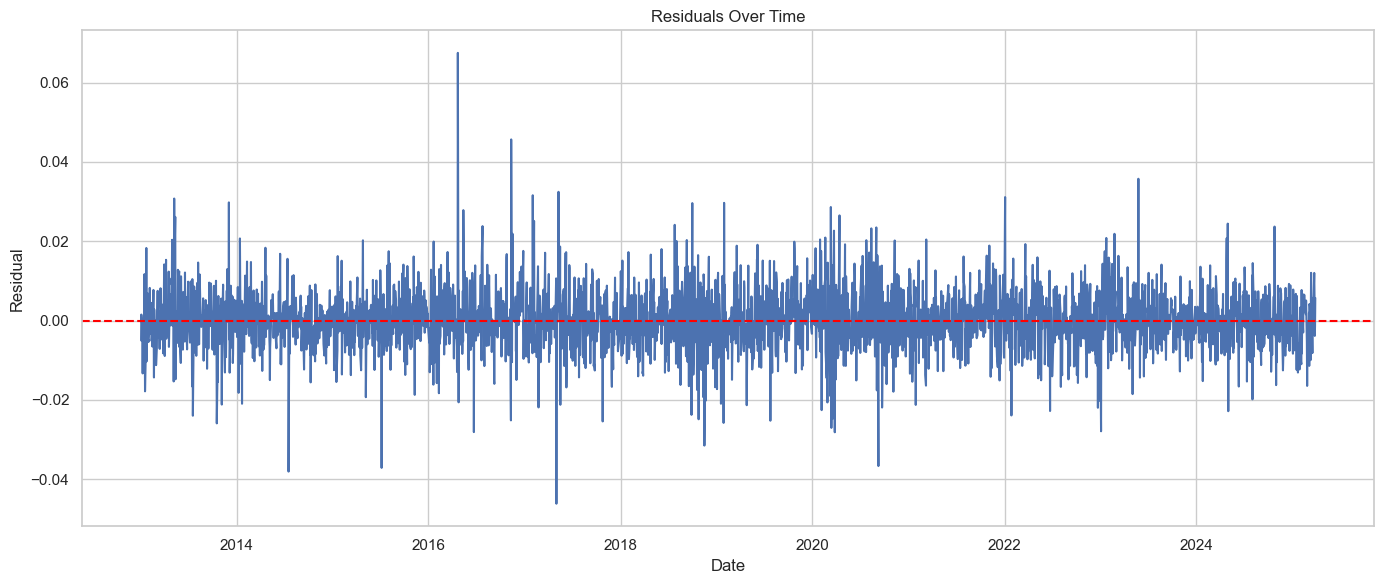

In [22]:
fig, ax = plt.subplots(figsize=(14,6))

x = merged_df.index
y = merged_df['Residual']

ax.plot(x,y)
ax.axhline(0, color='red', linestyle='--')
ax.set_title('Residuals Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Residual')

plt.tight_layout()
plt.show()

### Regression Diagnostic

#### Checking Linearity

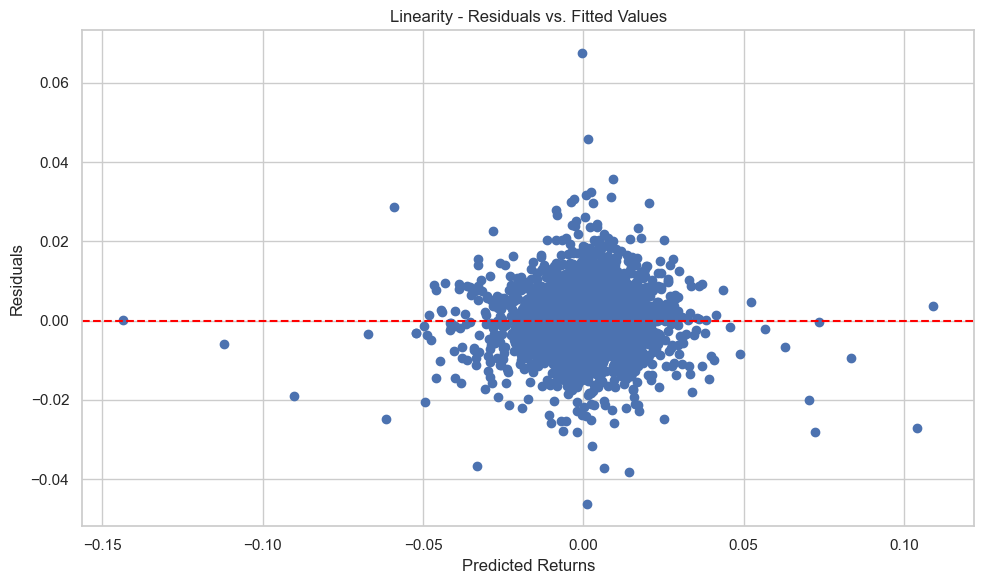

In [23]:
fig, ax = plt.subplots(figsize = (10,6))

x = merged_df['Predicted Returns']
y = merged_df['Residual']

ax.scatter(x,y)
ax.axhline(0, color='red', linestyle='--')
ax.set_title('Linearity - Residuals vs. Fitted Values')
ax.set_xlabel('Predicted Returns')
ax.set_ylabel('Residuals')


plt.tight_layout()
plt.show()

#### Checking Mean

In [24]:
predicted_return_mean = merged_df['Predicted Returns'].mean()
print(f'Mean of predicted returns is :{predicted_return_mean: .4f}')

Mean of predicted returns is : 0.0009


#### Checking homoscedasticity - Equal variance (Breusch - Pagan Test)

In [25]:
bp_test = sms.het_breuschpagan(merged_df['Residual'], model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
BPtest_dict = dict(zip(labels,bp_test))
print(BPtest_dict)


{'Lagrange multiplier statistic': np.float64(2.858192941749004), 'p-value': np.float64(0.7218371913284467), 'f-value': np.float64(0.5710545573475628), 'f p-value': np.float64(0.7222763062000014)}


#### Checking Normality of Residuals by plotting

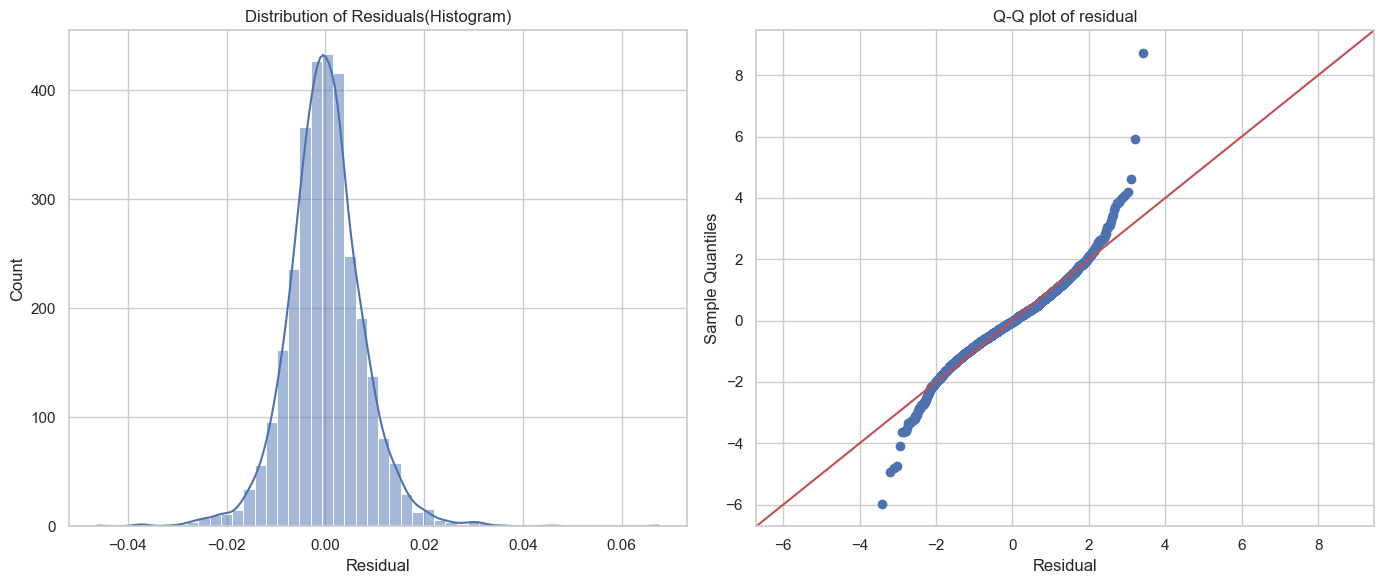

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))

data = merged_df['Residual']



sns.histplot(data, bins=50, kde=True, ax=ax1)
sm.qqplot(merged_df['Residual'], line='45', fit=True, ax=ax2)

ax1.set_title('Distribution of Residuals(Histogram)')
ax2.set_title('Q-Q plot of residual')
ax1.set_xlabel('Residual')
ax2.set_xlabel('Residual')

plt.tight_layout()
plt.show()

##### Checking Residual Normality using Statistical method

In [27]:

jb_stat, jb_pvalue, skew, kurtosis = sts.jarque_bera(merged_df['Residual'])
print(f"Jarque-Bera test statistic: {jb_stat:.2f}")
print(f"p-value: {jb_pvalue:.5f}")
print(f"Skewness: {skew:.3f}, Kurtosis: {kurtosis:.3f}")

Jarque-Bera test statistic: 2304.49
p-value: 0.00000
Skewness: 0.245, Kurtosis: 7.210
